<ipython-input-4-9843641d5837>:19: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = load_dataset(



Regression MSE: 297.2166

Classification Accuracy: 60.13%

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.01      0.01       315
           1       0.60      0.99      0.75       480

    accuracy                           0.60       795
   macro avg       0.47      0.50      0.38       795
weighted avg       0.50      0.60      0.46       795



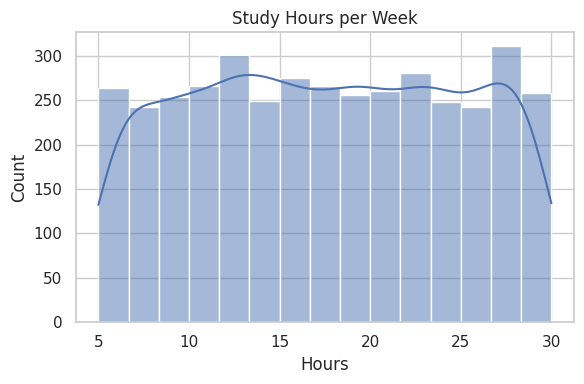

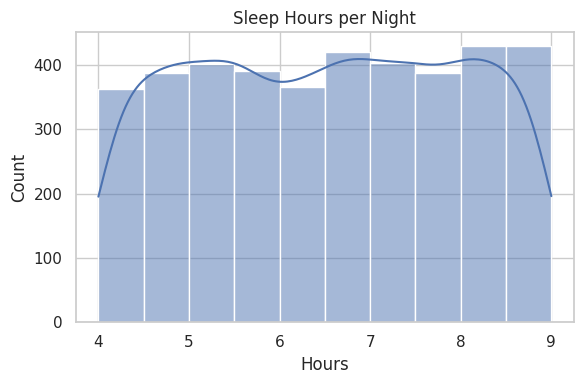

<ipython-input-4-9843641d5837>:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Grade', data=df, palette='Set2')


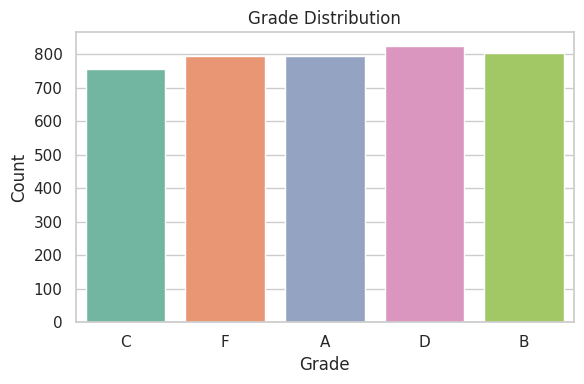

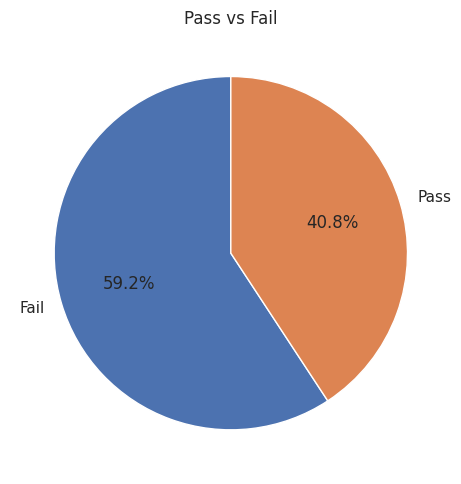

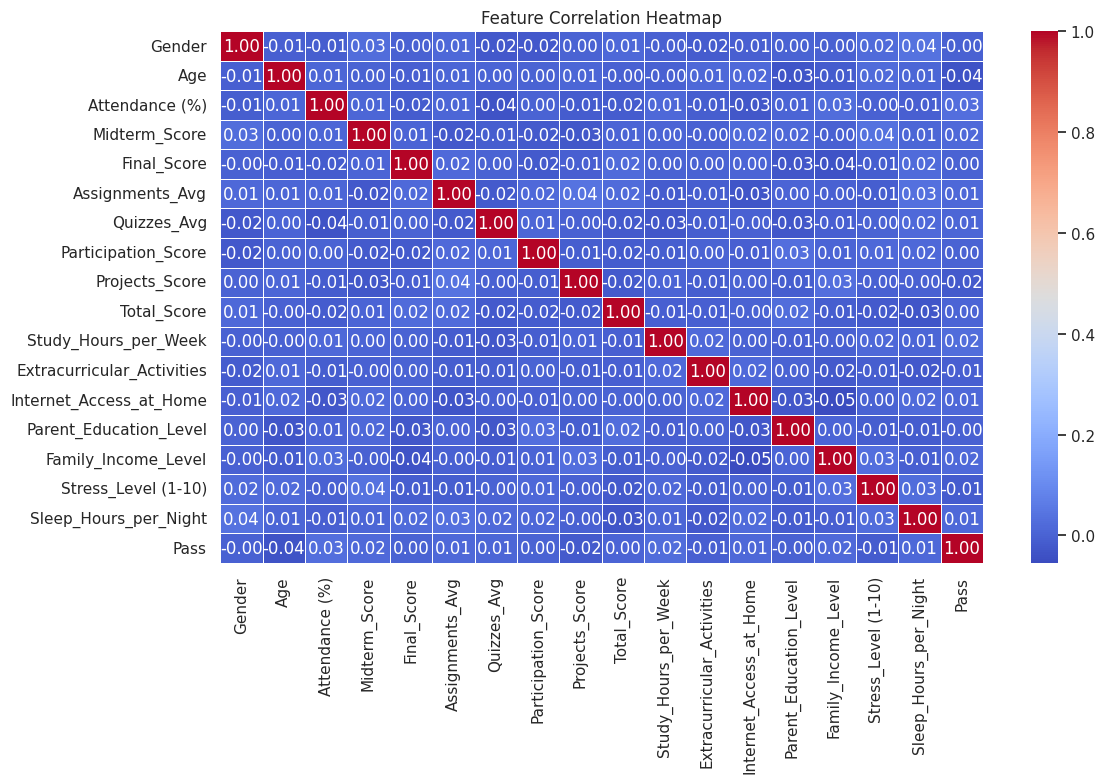

In [ ]:
# Cracking the Grades: Predicting Academic Performance Using Data Analytics
# ------------------------------------------------------------------------
# Install dependencies:
#   pip install kagglehub[pandas-datasets] scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from kagglehub import KaggleDatasetAdapter, load_dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

# 1) Load the dataset from Kaggle
file_path = "Students_Grading_Dataset.csv"  # adjust if the CSV has a different name
df = load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "mahmoudelhemaly/students-grading-dataset",
    file_path
)

# 2) Quick cleanup & feature engineering
df.dropna(inplace=True)  # drop any rows with missing values
df['Pass'] = df['Grade'].map(lambda g: 1 if g in ['A','B','C'] else 0)

# 3) Encode categorical features
categorical_cols = [
    'Gender', 'Extracurricular_Activities', 'Internet_Access_at_Home',
    'Parent_Education_Level', 'Family_Income_Level'
]
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 4) Select features & targets
features = [
    'Study_Hours_per_Week', 'Attendance (%)', 'Age', 'Gender',
    'Extracurricular_Activities', 'Internet_Access_at_Home',
    'Parent_Education_Level', 'Family_Income_Level',
    'Stress_Level (1-10)', 'Sleep_Hours_per_Night'
]
X = df[features]
y_reg = df['Final_Score']
y_clf = df['Pass']

# 5) Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6) Train/Test split
X_train, X_test, y_train_reg, y_test_reg = train_test_split(
    X_scaled, y_reg, test_size=0.2, random_state=42
)
_, _, y_train_clf, y_test_clf = train_test_split(
    X_scaled, y_clf, test_size=0.2, random_state=42
)

# 7) Fit Regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train_reg)
y_pred_reg = reg_model.predict(X_test)
print(f"\nRegression MSE: {mean_squared_error(y_test_reg, y_pred_reg):.4f}")

# 8) Fit Classification model
clf_model = LogisticRegression(max_iter=1000)
clf_model.fit(X_train, y_train_clf)
y_pred_clf = clf_model.predict(X_test)
print(f"\nClassification Accuracy: {accuracy_score(y_test_clf, y_pred_clf):.2%}")
print("\nClassification Report:\n", classification_report(y_test_clf, y_pred_clf))

# 9) Visualizations
sns.set(style="whitegrid")

# Study Hours distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Study_Hours_per_Week'], bins=15, kde=True)
plt.title("Study Hours per Week")
plt.xlabel("Hours")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Sleep Hours distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Sleep_Hours_per_Night'], bins=10, kde=True)
plt.title("Sleep Hours per Night")
plt.xlabel("Hours")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Grade distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Grade', data=df, palette='Set2')
plt.title("Grade Distribution")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Pass/Fail pie
plt.figure(figsize=(5,5))
df['Pass'].value_counts().plot.pie(
    autopct='%1.1f%%', labels=['Fail','Pass'], startangle=90
)
plt.title("Pass vs Fail")
plt.ylabel("")
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()
